In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2
import numpy as np
#import pandas as pd
#import seaborn as sns
#sns.set()
#pd.options.display.max_colwidth = 128
pylab.rcParams['figure.figsize'] = 12, 5
# d = pd.read_csv('...', parse_dates=['date'])
# pd.to_datetime(d['timestamp'], unit='s')
# with mpl.rc_context({"figure.figsize": (5, 5)}):
# with mpl.rc_context({"lines.linewidth": 2, "lines.color": "r"}):
# plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
# ax.set_xlabel('x label')


Populating the interactive namespace from numpy and matplotlib


In [134]:
4.5e15 / 24 / 60 / 60 / 1e6  # per microsecond, over one day

52083.333333333336

In [135]:
4.5e15 / 360 / 60 / 60 / 1e6  # per microarcsecond, over one rev

3472.222222222222

In [136]:
4.5e15 / (2022 - 1973) / 365.25 / 24 / 60 / 60 / 1e6  # per microsecond, over 

2.910130513533271

In [138]:
4.5e15 / (2022 - 1973) / 365.25 / 360 / 60 / 60 / 1e3  # per mas, over finals file

194.00870090221807

In [146]:
# A number like "0.8084178" is specified to 1e-7 clock seconds.
# How many arcseconds does that correspond to at the equator?
1e-7 * 15 * 1e6  # micro-arcseconds

1.5

In [145]:
µas = (2022 - 1973) * 365.25 * 360 * 60 * 60 * 1e6
µas / 4.5e15

5.154408

In [147]:
# So, a single float is insufficient!
# BUT WAIT.
# Is it? How many unique values can come OUT for ∆T?
# It might not be useful for the input parameter to have
# very high precision if the output value can't assume
# all the corresponding values anyway.

In [ ]:
# Principles.
# 1. We can use the Earth Rotation angle to very high precision.
#    Per the comparison above between seconds-of-time and
#    seconds-of-arc, a full float’s worth of precision cannot
#    ...

In [163]:
from skyfield.api import load
ts = load.timescale()
start = ts.utc(1973, 1, 2)
end = ts.utc(2021, 10, 23)
delta_t_1 = start.delta_t
delta_t_2 = end.delta_t
spread = delta_t_2 - delta_t_1

# Using a single float to interpolate over this period means
# only being able to designate 

In [169]:
# How long will plateaus of ∆T last if we interpolate with a float?

unique_values = 4.5e15
(end.tt - start.tt) * 24 * 60 * 60 * 1e6 / unique_values # µs

0.34225920555556116

In [177]:
# How long MUST plateaus of ∆T last, given that ∆T is returned as
# a single float? (Or — should it be returned as two?!)

step = np.nextafter(delta_t_2, 1e99) - delta_t_2
steps = spread / step
steps / (end.tt - start.tt) / 24 / 60 / 60 / 1e6 # µs

1.188709850191237

In [ ]:
# What if we assumed equal spacing — oh, we can't, it's UTC, right?!

In [162]:
import sys
sys.float_info
#1 / sys.float_info.epsilon

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

In [106]:
xp, yp = np.array([
    [10.0, 0.5],
    [11.0, 1.5],
    [12.0, 4.0],
]).T

In [107]:
fraction = np.arange(-40, 41) * 1e-16
whole = [11.0] * len(fraction)

In [108]:
#list(whole + fraction)

In [109]:
def highres_plot(y):
    h = y.max() - y.min()
    ylim(y.min() - h/5, y.max() + h/5)
    plot(fraction, y, 'o')

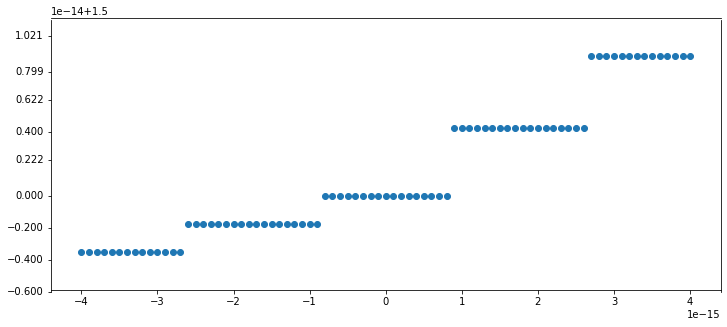

In [111]:
# Cannot use bare interp: entirely lose fraction,
# graph had plateaus.

y = np.interp(whole + fraction, xp, yp)
highres_plot(y)

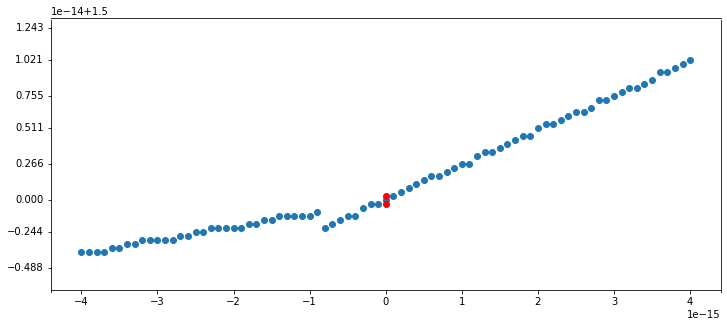

In [118]:
# To use the fraction, need a slope.
# But we cannot even use whole + fraction for selecting datum!
# Because:

slope = np.diff(yp)
slope[i - 1]

epsilon = whole - (whole + fraction) + fraction

i = np.searchsorted(xp, whole + fraction, 'right')
y = np.interp(whole + fraction, xp, yp) + epsilon * slope[i - 1]
highres_plot(y)
plot([0,0], [np.nextafter(1.5,1), np.nextafter(1.5,2)], 'ro')

In [129]:
1.0 / 360.0 / 60.0 / 60.0 / 1e6 # micro arcsecond

7.71604938271605e-13

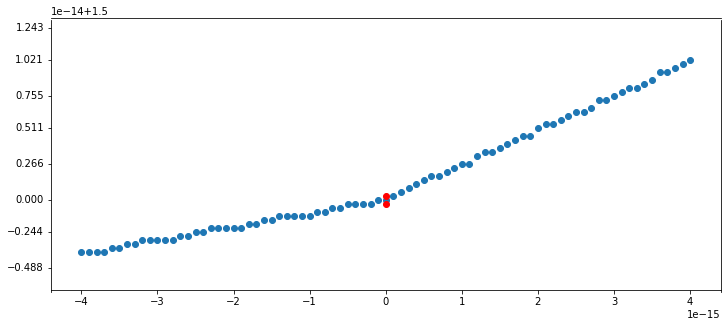

In [127]:
# To use the fraction, need a slope.
# But we cannot even use whole + fraction for selecting datum!
# Because:

slope = np.diff(yp)
slope[i - 1]

wf = whole + fraction
epsilon = whole - wf + fraction
negeps = epsilon < 0.0
wf[negeps] = np.nextafter(wf[negeps], -1e99)
epsilon = whole - wf + fraction
#print(epsilon)

i = np.searchsorted(xp, wf, 'right')
y = np.interp(wf, xp, yp) + epsilon * slope[i - 1]
highres_plot(y)
plot([0,0], [np.nextafter(1.5,1), np.nextafter(1.5,2)], 'ro')